# 3 Train

In [1]:
import numpy as np
from skimage import io
from keras.models import Model, load_model
from keras.applications import inception_v3
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import losses, optimizers
from keras_applications.mobilenet_v2 import MobileNetV2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

RANDOM_SEED = 43
np.random.seed(RANDOM_SEED)

Using TensorFlow backend.


In [2]:
import nbimporter
from ResNet34 import ResnetBuilder

Importing Jupyter notebook from ResNet34.ipynb


## Load Data

In [3]:
""" load data .npy file"""
X_train, y_train = np.load('./data/X_train.npy'), np.load('./data/y_train.npy')
X_val, y_val = np.load('./data/X_val.npy'), np.load('./data/y_val.npy')
X_test, y_test = np.load('./data/X_test.npy'), np.load('./data/y_test.npy')
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_val.shape:', X_val.shape)
print('y_val.shape:', y_val.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (2992, 224, 224, 3)
y_train.shape: (2992,)
X_val.shape: (997, 224, 224, 3)
y_val.shape: (997,)
X_test.shape: (1000, 224, 224, 3)
y_test.shape: (1000,)


## Preprocess

In [4]:
# Preprocess function
def preprocess_im(im):
    im = im.astype(np.float32)
    im = inception_v3.preprocess_input(im)
    return im

# def preprocess_val(X_val, y_val):
# Preprocess validation
X_val = inception_v3.preprocess_input(X_val.astype(np.float32))

# Preprocess y
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

In [5]:
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(997, 224, 224, 3)
(2992, 2)
(997, 2)


## Build Model

In [18]:
def build_model():
    """ build model. first load the model structure following by
    GlobalAveragePooling, Dropout and Dense layer for a binary classification  
    """
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    print(base_model.summary())
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.33)(x)
    x = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=x)

    print(model.summary())

In [19]:
build_model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (Activation)         (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
__________________________________________________________________________________________________
expanded_c

## Build ResNet18

In [11]:
from keras import backend as K
K.set_image_dim_ordering('tf')
resnet18 = ResnetBuilder.build_resnet_18((3, 224, 224), 2)
resnet18.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_51 (BatchNo (None, 112, 112, 64) 256         conv2d_57[0][0]                  
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 112, 112, 64) 0           batch_normalization_51[0][0]     
__________________________________________________________________________________________________
max_poolin

In [7]:
base_model = Model(inputs=resnet18.input, outputs=resnet18.layers[-3].input)
base_model.summary()
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.33)(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

## Build ResNet34

In [10]:
from keras import backend as K
K.set_image_dim_ordering('tf')
resnet34 = ResnetBuilder.build_resnet_34((3, 224, 224), 1)
resnet34.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 112, 112, 64) 256         conv2d_21[0][0]                  
__________________________________________________________________________________________________
activation_18 (Activation)      (None, 112, 112, 64) 0           batch_normalization_18[0][0]     
__________________________________________________________________________________________________
max_poolin

In [23]:
base_model = Model(inputs=resnet34.input, outputs=resnet34.layers[-3].input)
base_model.summary()
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.33)(x)
x = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_37 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_34 (BatchNo (None, 112, 112, 64) 256         conv2d_37[0][0]                  
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 112, 112, 64) 0           batch_normalization_34[0][0]     
__________________________________________________________________________________________________
max_poolin

## Train Top Model

In [12]:
def train_stage_1(model):
    """ there are three training stages in total. 
    this is the first stage where we only train the top layer. other layers are freezed.
    """
    # Freeze layers (Only top trainable)
    for layer in base_model.layers:
        layer.trainable = False

    loss = losses.categorical_crossentropy
    optimizer = optimizers.Adam()
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # callback list
    m_q = 'val_loss'
    model_path = './models/rn18_224_foodornot_1.h5'
    check_point = callbacks.ModelCheckpoint(filepath=model_path, monitor=m_q, save_best_only=True, verbose=1)
    early_stop = callbacks.EarlyStopping(patience=1, monitor=m_q, verbose=1)
    reduce_lr = callbacks.ReduceLROnPlateau(patience=0, factor=0.33, monitor=m_q, verbose=1)
    callback_list = [check_point, early_stop, reduce_lr]
    
    # data generator
    datagen = ImageDataGenerator(horizontal_flip=True,
                                 rotation_range=15,
                                 fill_mode='reflect',
                                 preprocessing_function=preprocess_im)

    # Batch size
    batch_size = 64
    model.summary()
    # start training
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        validation_data=(X_val, y_val),
                        epochs=99,
                        steps_per_epoch=len(X_train) / batch_size,
                        callbacks=callback_list)
    print('Top Model Train Done.')

In [13]:
train_stage_1(resnet18)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 112, 112, 64) 9472        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_51 (BatchNo (None, 112, 112, 64) 256         conv2d_57[0][0]                  
__________________________________________________________________________________________________
activation_51 (Activation)      (None, 112, 112, 64) 0           batch_normalization_51[0][0]     
__________________________________________________________________________________________________
max_poolin

Epoch 1/99
47/46 [==============================] - 651s 14s/step - loss: 1.3548 - acc: 0.8127 - val_loss: 1.4015 - val_acc: 0.7603

Epoch 00001: val_loss improved from inf to 1.40146, saving model to ./models/rn18_224_foodornot_1.h5
Epoch 2/99
47/46 [==============================] - 664s 14s/step - loss: 1.0820 - acc: 0.8760 - val_loss: 1.2524 - val_acc: 0.8445

Epoch 00002: val_loss improved from 1.40146 to 1.25241, saving model to ./models/rn18_224_foodornot_1.h5
Epoch 3/99
47/46 [==============================] - 669s 14s/step - loss: 0.9334 - acc: 0.8736 - val_loss: 0.8430 - val_acc: 0.9017

Epoch 00003: val_loss improved from 1.25241 to 0.84303, saving model to ./models/rn18_224_foodornot_1.h5
Epoch 4/99
47/46 [==============================] - 705s 15s/step - loss: 0.7948 - acc: 0.9019 - val_loss: 1.0616 - val_acc: 0.7553

Epoch 00004: val_loss did not improve from 0.84303

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00033000001567415896.
Epoch 00004: early stopp

## Train All Model - Finetune

In [14]:
# Load the model
model = load_model('./models/rn18_224_foodornot_1.h5')

In [15]:
def train_stage_2(model_path):
    model = load_model(model_path)
# ** Configuation **
    # Open layers
    # for layer in model.layers[:249]:
    #     layer.trainable = False
    # for layer in model.layers[249:]:
    #     layer.trainable = True
    for layer in model.layers:
        layer.trainable = True

    # Compile the model
    loss = losses.categorical_crossentropy
    optimizer = optimizers.SGD(lr=0.001, momentum=0.9)
    metrics = ['accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Callbacks
    m_q = 'val_loss'
    model_path = './models/rn34_224_foodornot_2.h5'
    check_pt = callbacks.ModelCheckpoint(filepath=model_path, monitor=m_q, save_best_only=True, verbose=1)
    early_stop = callbacks.EarlyStopping(patience=3, monitor=m_q, verbose=1)
    reduce_lr = callbacks.ReduceLROnPlateau(patience=1, factor=0.33, monitor=m_q, verbose=1)
    callback_list = [check_pt, early_stop, reduce_lr]


    # ** Fit **
    # Data Generator
    datagen = ImageDataGenerator(horizontal_flip=True,  
                                 rotation_range=15,
                                 fill_mode='reflect',                          
                                 preprocessing_function=preprocess_im)


    # Batch size
    batch_size = 64

    # Fit
    model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                        validation_data=(X_val, y_val),  
                        epochs=99,
                        steps_per_epoch=len(X_train)/batch_size,
                        callbacks=callback_list)                    
    print('All Model Train Done.')

In [18]:
train_stage_2('./models/rn18_224_foodornot_1.h5')

Epoch 1/99
47/46 [==============================] - 733s 16s/step - loss: 0.8138 - acc: 0.9139 - val_loss: 0.9007 - val_acc: 0.8736

Epoch 00001: val_loss improved from inf to 0.90067, saving model to ./models/rn34_224_foodornot_2.h5
Epoch 2/99
47/46 [==============================] - 689s 15s/step - loss: 0.8023 - acc: 0.9098 - val_loss: 0.8631 - val_acc: 0.8937

Epoch 00002: val_loss improved from 0.90067 to 0.86315, saving model to ./models/rn34_224_foodornot_2.h5
Epoch 3/99
47/46 [==============================] - 690s 15s/step - loss: 0.7902 - acc: 0.9168 - val_loss: 0.8624 - val_acc: 0.8907

Epoch 00003: val_loss improved from 0.86315 to 0.86240, saving model to ./models/rn34_224_foodornot_2.h5
Epoch 4/99
47/46 [==============================] - 714s 15s/step - loss: 0.7875 - acc: 0.9213 - val_loss: 0.8329 - val_acc: 0.9007

Epoch 00004: val_loss improved from 0.86240 to 0.83293, saving model to ./models/rn34_224_foodornot_2.h5
Epoch 5/99
47/46 [==============================] - 

## Find Optimal Threshold

Find optimal threshold by using validation data

In [3]:
# Load model
model = load_model('./models/model_foodvsnot.h5')

In [4]:
# Predict validation data
p_val = model.predict(inception_v3.preprocess_input(X_val.astype(np.float32)), verbose=1)

997/997 [==============================] - 5s     


Optimum Threshold: 0.766766766767
Max. Accuracy: 0.98294884654


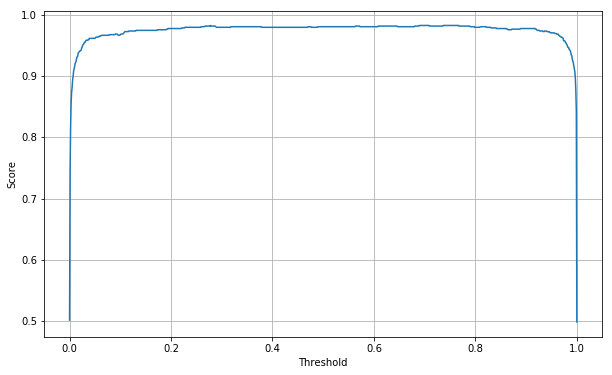

In [15]:
# Calculate thresholds and accuracies
thresholds = np.linspace(0, 1, 1000)
accuracies = [np.mean(y_val == (p_val[:, 1] > t).astype(np.int)) for t in thresholds]
# f1_scores = [metrics.f1_score(y_val, (p_val[:, 1] > t)) for t in thresholds]
# Find optimum threshold
optimum_pair = sorted(zip(thresholds, accuracies), key=lambda x: x[1])[-1]
print 'Optimum Threshold:', optimum_pair[0]
print 'Max. Accuracy:', optimum_pair[1]

# Plot
fig = plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies)
# plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold');
plt.ylabel('Score');
plt.grid('on')